<div style="background-color:#e0f7fa; border-left: 8px solid #00796b; padding: 20px; margin: 20px 0; border-radius: 8px;">
    <h1 style="text-align:center; color:#004d40; font-size: 28px; margin-bottom: 10px;">Workshop 5: Predicting Term Deposit Subscriptions Using ML Models</h1>
    <h3 style="text-align:center; color:#00695c;">July 27, 2025</h3>
    <hr style="border-top: 1px solid #004d40;">
    <p style="font-size: 16px; line-height: 1.5; color:#333;">
    In this workshop, we analyze a bank client dataset to predict whether a client will subscribe to a term deposit. The task involves data preprocessing, exploratory analysis, and the application of machine learning models. Key steps include handling categorical variables, normalization, splitting the data, and <b>building KNN, Decision Tree, and Logistic Regression</b> models. Model performance is evaluated based on accuracy, offering insights into effective predictive modeling techniques in banking contexts.
    </p>
    <p style="font-size: 16px; color:#555;"><b>Contributors:</b> Sanuja Vihanga Senadeera, Naveen Karan Krishna, Thi Anh Tram Le, Mayra Geraldine Reinoso Varon, Justin Kyle Pedro</p>
</div>

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

Markdown with this color is the explanation of code

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">

Markdown with this color is the explanation/interpretation of result

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">1. Import Libraries</h2>
</div>

In [555]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Machine learning models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# Model selection and dataset splitting
from sklearn.model_selection import train_test_split

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

- `pandas (pd)`:  For handling and manipulating tabular data.

- `numpy (np)`: For numerical operations, arrays, and mathematical functions like mean, standard deviation, etc.

- `seaborn (sns)`: Built on top of matplotlib, used for attractive and informative statistical graphics (e.g., heatmaps, boxplots).

- `matplotlib.pyplot (plt)`: A core plotting library used to create static, animated, and interactive visualizations in Python. 

- `StandardScaler`: Scales features to have a mean of 0 and a standard deviation of 1.

- `DecisionTreeClassifier`: A tree-based model for classification tasks.

- `plot_tree`: Visualizes a decision tree structure.

- `KNeighborsClassifier`: Implements the K-Nearest Neighbors algorithm for classification.

- `LogisticRegression`: A linear model used for binary/multi-class classification.

- `accuracy_score`: Evaluates how many predictions matched the true values.

- `confusion_matrix`: A table showing correct vs. incorrect predictions per class.

- `cross_val_score`: Performs cross-validation to get a more reliable measure of model performance.

- `GridSearchCV`: Performs hyperparameter tuning using cross-validation to find the best model parameters.

- `train_test_split`: Splits the dataset into training and testing subsets

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">2. Loading Dataset</h2>
</div>

In [495]:
# Reading the bank client data csv file
df = pd.read_csv("bank.csv")

# Preview the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code loads and shows a sample of the dataset:

* `pd.read_csv("bank.csv")`: Reads the **bank client data** from a CSV file into a DataFrame called `df`.

* `df.head()`: Displays the **first 5 rows** of the dataset so we can quickly see what the data looks like.

</div>


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">3. Data Exploration</h2>
</div>

In [497]:
# To check the datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code uses `df.info()` to inspect the DataFrame:

- Displays the **number of rows and columns**.

- Lists each column with its **data type** and **non-null count**.

- Helps check for **missing values**, data types, and overall structure of `df`.

In [498]:
# To check the basic descriptive statistics of the features
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4521.0,NaN,NaN,NaN,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
job,4521,12,management,969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4521,3,married,2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4521,4,secondary,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4521,2,no,4445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,4521.0,NaN,NaN,NaN,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
housing,4521,2,yes,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4521,2,no,3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4521,3,cellular,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,4521.0,NaN,NaN,NaN,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code displays summary statistics for all features in the dataset:

* `describe()`: Generates basic descriptive statistics like:

  * `count`: Number of non-missing values
    
  * `mean`, `std`: Mean and standard deviation (for numeric columns)
 
  * `min`, `25%`, `50%`, `75%`, `max`: Percentiles (for numeric columns)
 
  * `unique`, `top`, `freq`: For categorical columns, it shows number of unique values, most frequent value, and its frequency
 
* `include='all'`: Ensures statistics are shown for **both numeric and categorical columns**.

* `T`: Transposes the output so that **columns become rows**, making it easier to read.

In [499]:
# To check the missing values
df.isnull().sum().to_frame(name = 'Missing Values').transpose()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code checks for missing (null) values in the dataset:

* `df.isnull()`: Returns a DataFrame of the same shape as `df`, where each cell is `True` if the value is missing, else `False`.
  
* `sum()`: Adds up the `True` values (treated as 1) **column-wise** to count how many missing values each column has.

* `to_frame(name='Missing Values')`: Converts the resulting Series into a **DataFrame** with a column named `"Missing Values"`.

* `transpose()`: Rotates the result so that the columns become rows, making the output more compact and easier to view.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">4. Feature Selection</h2>
</div>

In [501]:
# Prepare features and target for the ML models
X = df.drop('y', axis = 1)
Y = df['y']

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code prepares the input features and target variable for machine learning:

`X = df.drop('y', axis=1)`

* Creates a new DataFrame `X` by **dropping the column `'y'`** from `df`.
  
* `X` contains all the **features (independent variables)** used to predict the target.

`Y = df['y']`

* Creates a Series `Y` containing only the **target variable** (dependent variable) named `'y'`.
  
* This is the column the model will learn to predict.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">5. One-Hot Encoding</h2>
</div>

In [503]:
# One-hot encode categorical variables in 'X'
X_encoded = pd.get_dummies(X, drop_first=True).astype(int)

# Encode binary target variable 'Y'
Y_encoded = Y.map({'no': 0, 'yes': 1})

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code converts categorical variables into numerical format for machine learning models:

`X_encoded = pd.get_dummies(X, drop_first=True).astype(int)`

* `pd.get_dummies()`: Converts categorical columns in `X` into multiple **binary (0/1) columns**, one for each category (called one-hot encoding).
  
* `drop_first=True`: Drops the first category in each categorical feature to **avoid multicollinearity** (redundant features).

* `astype(int)`: Ensures all the resulting dummy variables are of integer type (0 or 1).

`Y_encoded = Y.map({'no': 0, 'yes': 1})`

* Maps the target variable `Y`, which has categories `'no'` and `'yes'`, to numeric values:

  * `'no'` as 0

  * `'yes'` as 1
 
* This creates a numeric binary target needed for most machine learning algorithms.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">6. Normalize the Dataset</h2>
</div>

In [505]:
# Scale features in X_encoded using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code standardizes the feature values to improve model performance:

`scaler = StandardScaler()`

* Creates an instance of `StandardScaler`, a tool that standardizes features by removing the mean and scaling to unit variance.

`X_scaled = scaler.fit_transform(X_encoded)`

* `fit_transform()`:

  * **Fits** the scaler on `X_encoded` by calculating the mean and standard deviation for each feature.
    
  * Then **transforms** the data by subtracting the mean and dividing by the standard deviation, resulting in scaled features with mean 0 and standard deviation 1.
 
* The output `X_scaled` is a NumPy array with standardized feature values.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">7. Dividing the Dataset</h2>
</div>

In [631]:
# Splitting the data as 70% training and 30% testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size = 0.3, random_state = 23)

#Checking the shape of each
print(' Train dataset shape:', X_train.shape, ' Validation dataset shape:', X_test.shape)

 Train dataset shape: (3164, 42)  Validation dataset shape: (1357, 42)


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code splits the dataset into training and testing sets for model building and evaluation:

- `train_test_split()` splits the data:

    - **70% for training** (`x_train`, `y_train`)

    - **30% for validation/testing** (`x_val`, `y_val`)

    - `random_state=23` ensures the same split every time (for reproducibility).

- Finally, it prints the shape of the training and validation datasets to confirm the split.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">8. Applying ML Models</h2>
</div>

### 8.1 K-Nearest Neighbors

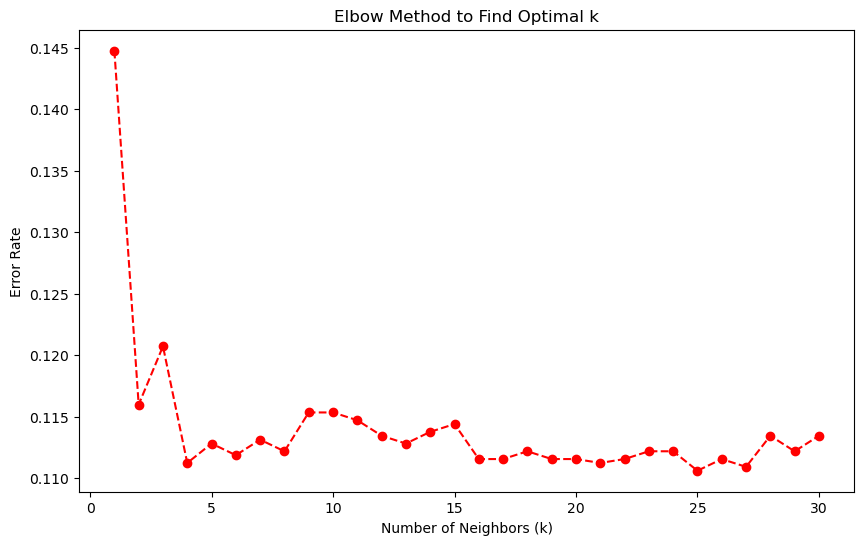

In [569]:
# Use Elbow Method to find the optimal number of neighbors (k) for KNN
error_rates = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    error_rates.append(1 - scores.mean())  

# Plot error rate vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='r')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Elbow Method to Find Optimal k")
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code helps find the best number of neighbors (`k`) to use in a KNN model:

* It tries different values of `k` from 1 to 30.
  
* For each `k`, it checks how well the model performs using cross-validation.

* It calculates the error rate (how often the model is wrong) for each `k`.

* It saves these error rates in a list.

Then, it **plots the error rates against the values of `k`** so we can see which `k` gives the lowest error. The best `k` is usually where the error stops going down much, called the "elbow."

In [511]:
# Perform GridSearchCV to find the optimal number of neighbors (k) for KNN
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)

# Print the best value of k found by GridSearchCV
print("Best k:", grid.best_params_['n_neighbors'])

Best k: 25


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code uses GridSearchCV to find the best number of neighbors (`k`) for the KNN model:

* `param_grid = {'n_neighbors': range(1, 31)}`: Defines the range of `k` values to test (from 1 to 30).

* `knn = KNeighborsClassifier()`: Creates a basic KNN model.

* `GridSearchCV(...)`:

  * Tries each `k` value using **10-fold cross-validation**.
    
  * Uses **accuracy** as the scoring metric.
 
  * Finds the best `k` that gives the highest average accuracy.

* `grid.fit(X_train, Y_train)`: Fits the model on the training data using all the `k` values.

* `grid.best_params_['n_neighbors']`: Prints the value of `k` that performed the best.

</div>


In [512]:
# To make predictions on the test set
best_knn = grid.best_estimator_
Y_pred_knn = best_knn.predict(X_test)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code makes predictions on the test data using the best KNN model found by GridSearchCV:

* `grid.best_estimator_`: Retrieves the **best KNN model** (with the optimal `k`) found during GridSearchCV.

* `best_knn.predict(X_test)`: Uses this best model to **predict the target values** for the test set (`X_test`).

* `Y_pred_knn`: Stores the predicted values, which can be compared to the actual values (`Y_test`) to evaluate the model’s performance.

</div>


In [553]:
# Evaluate the best KNN model on the test data
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_knn):.2f}")


Test Set Evaluation:
Accuracy: 0.89


<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> KNN Accuracy</h2>

The **K-Nearest Neighbors (KNN) model**, using the **optimal number of neighbors set to 25**, achieved an **accuracy of 89%** on the test data. This means the model correctly predicted whether clients subscribed to a term deposit in **89 out of 100 cases**. Such a **high accuracy** indicates the model is effective at **capturing patterns** in the data and **generalizes well** to unseen clients, making it a **reliable tool** for predicting client subscription behavior.



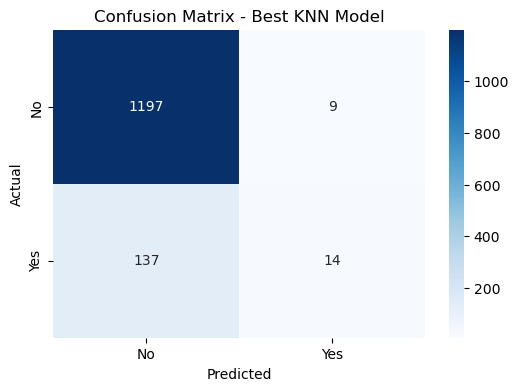

In [514]:
# Confusion matrix for best KNN model
conf_mat = confusion_matrix(Y_test, Y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best KNN Model")
plt.show()

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> KNN Interpretation</h2>

From the **confusion matrix** results, the model correctly identified **1197 clients** who did not subscribe to a term deposit (“no”), demonstrating strong **accuracy** in predicting non-subscribers. It also correctly predicted **14 clients** who did subscribe (“yes”). However, the model missed **137 actual subscribers** by classifying them as non-subscribers, resulting in a significant number of **false negatives**. Additionally, there were **9 false positives** where the model incorrectly predicted clients as subscribers when they were not.

This indicates that while the model is effective at **ruling out clients** who are unlikely to subscribe, it has limited success in **identifying** those who actually do subscribe. In a business context, this means the model could efficiently reduce **wasted marketing efforts** on unlikely clients but may also **miss many potential customers** who would respond positively to a term deposit offer.

To enhance marketing effectiveness, it is crucial to improve the model’s ability to **detect actual subscribers**. This could involve exploring **alternative algorithms**, tuning model parameters further, or incorporating additional **predictive features**. Overall, the current model serves as a good **baseline** but requires **refinement** to better support targeted marketing campaigns aimed at increasing term deposit **subscriptions**.


### 8.2 Decision Tree Model

In [643]:
#Create an instance of the DecisionTreeClassifier
model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=23)

#Fit the model to the training data
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=20,
                       random_state=23)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code trains a **Decision Tree Classifier** with specific settings:

- Creates a model with:

    - `max_depth=4`: Limits the tree depth to prevent overfitting.

    - `min_samples_split=20`: A node must have at least 20 samples to be split.

    - `min_samples_leaf=10`: A leaf node must have at least 10 samples.

    - `random_state=29`: Ensures consistent results every run.
 
- **Fits** the model to the training data (`x_train`, `y_train`), learning patterns for classification.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Decision Tree Model Constraints Interpretation</h2>
    
When we initially trained the decision tree without any restrictions, the resulting tree was very large and complex. This often leads to overfitting, where the model learns not only the general patterns but also noise and minor fluctuations in the training data, resulting in poor generalization to new data.

To address this, we introduced constraints on the tree’s growth by setting:

* **max_depth=4**: This limits the maximum depth of the tree to 4 levels, preventing it from growing too deep and overly complex.
  
* **min_samples_split=20**: This requires that a node must have at least 20 samples before it can be split further, which avoids splits based on very small subsets that might not be statistically significant.

  
* **min_samples_leaf=10**: This ensures that each leaf node has at least 10 samples, preventing the model from creating leaves that are too specific and potentially overfitting.

By applying these constraints, the tree becomes more generalized and interpretable, and the model focuses on the most important splits rather than fitting to noise. As a result, we obtained better performance metrics on validation or test data, confirming improved generalization and predictive accuracy.

In [518]:
# To make prediction on the dataset 
Y_pred_dt = model.predict(X_test)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code uses the trained **Decision Tree model** to make predictions:

- `y_pred_dt`: Predictions on the **test set** (`X_test`), used to assess how well the model generalizes to new data.

These predictions will be used to calculate performance metrics like accuracy, precision, recall, etc.

In [519]:
# Evaluate Decision Tree model on test data
print("Decision Tree Results")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_dt):.2f}")

Decision Tree Results
Accuracy: 0.90


<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Decision Tree Accuracy</h2>

The **Decision Tree model** achieved a **test accuracy of 90%**, meaning it correctly predicted whether a client subscribed to a term deposit in **9 out of 10 cases**. This high level of accuracy indicates that the model has successfully **learned patterns** from the training data and is able to **generalize well** to new, unseen data.

In the context of this project, where the goal is to predict client subscription behavior, such a result is **promising**. A **90% accuracy** suggests the model can be a **reliable tool** for supporting marketing strategies by identifying likely subscribers and non-subscribers with a high degree of **confidence**.


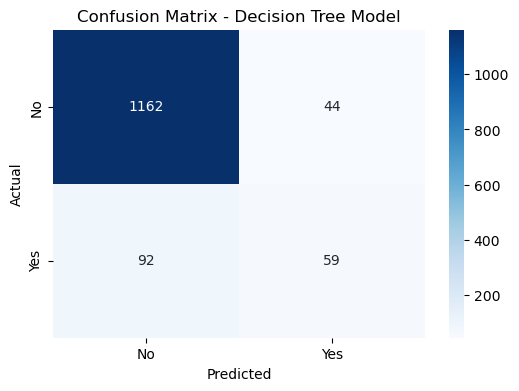

In [520]:
# Confusion matrix for Decision Tree model
conf_mat = confusion_matrix(Y_test, Y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree Model")
plt.show()

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Decision Tree Interpretation</h2>

From the **confusion matrix** results, the model correctly identified **1162 clients** who did not subscribe to the term deposit, which shows it performs well in recognizing **non-subscribers**. However, it also misclassified **44 non-subscribers as subscribers**, representing **false positives**, cases where the model incorrectly predicts interest.

On the other side, the model correctly identified **59 clients** who actually subscribed, which is a noticeable improvement in detecting **true positives** compared to the KNN model. However, it still misclassified **92 actual subscribers** as non-subscribers, meaning a significant number of potential customers are being missed (**false negatives**).

In business terms, while the Decision Tree model slightly sacrifices some **precision** on non-subscribers, it improves the model’s **sensitivity** to actual subscribers. This balance is valuable in marketing contexts, where **identifying and targeting potential clients** is critical. The model could help improve campaign targeting but may still need refinement to reduce **missed opportunities** among actual subscribers.


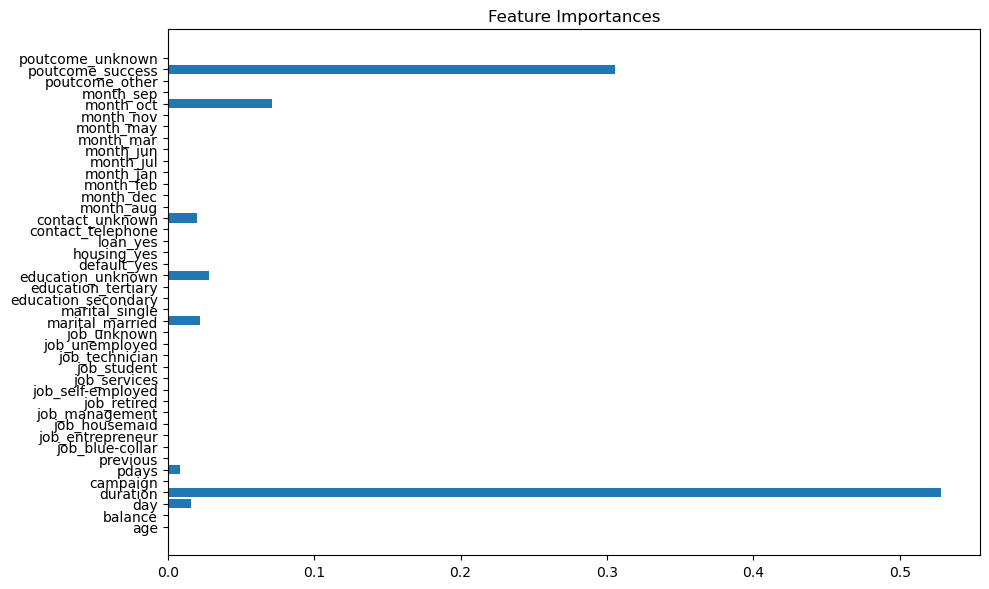

In [521]:
# Feature importances
importances = model.feature_importances_
feature_names = X_encoded.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code visualizes **feature importances** from the trained Decision Tree model:

- `model.feature_importances_`: Measures how much each feature contributes to the decision-making.

- Creates a **horizontal bar chart** with:

    - Features on the y-axis (`feature_names`)

    - Their importance scores on the x-axis (`importances`)

- Helps identify which features are **most influential** in predicting the target variable.

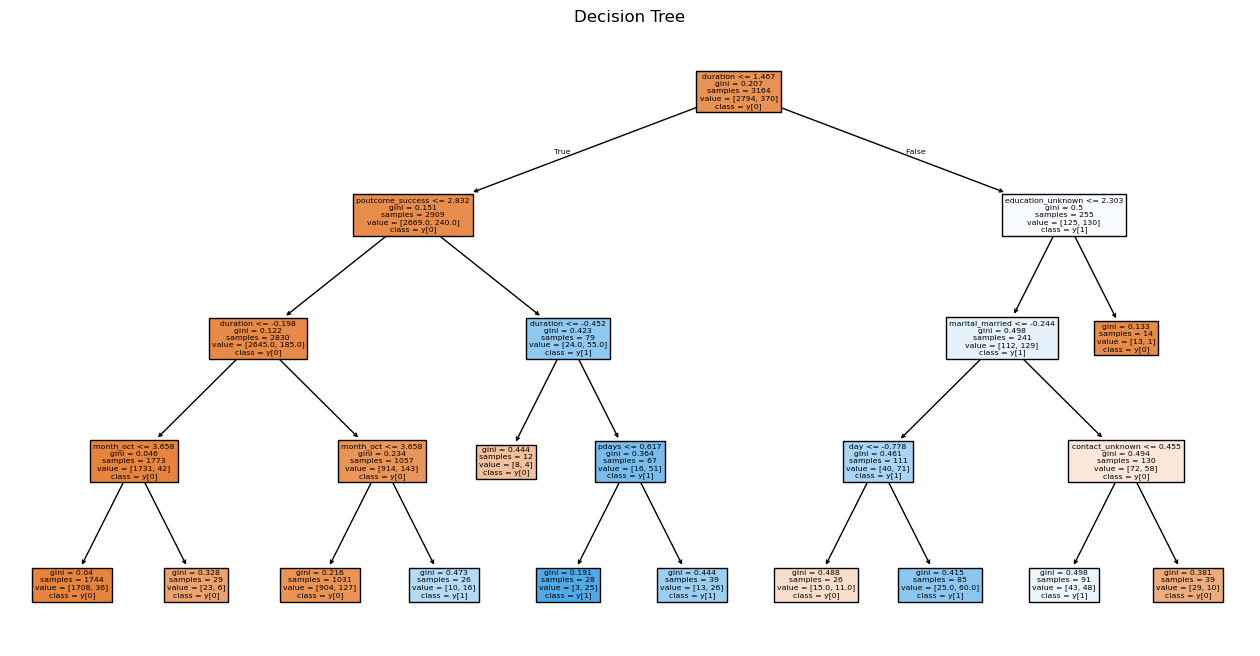

In [522]:
# Visualize the decision tree
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X_encoded.columns, class_names=True, filled=True)
plt.title("Decision Tree")
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code **visualizes the trained Decision Tree**:

- `plot_tree()` draws the structure of the decision tree:

    - Shows splits, thresholds, and predicted classes.

    - `filled=True` adds color based on class purity.

    - `feature_names` and `class_names=True` label the nodes clearly.

- `plt.show()` displays the tree inline.

It helps us **interpret how the model makes decisions** based on different features.

### 8.3 Logistic Regression Model

In [559]:
# Initialize and train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state = 23)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=23)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates and trains a Logistic Regression model to predict outcomes:

* It sets up the model and allows it enough steps (`max_iter=1000`) to learn properly.

* The `random_state=23` makes sure the training results are the same each time you run the code.

* Then, it trains the model using the training data (`X_train` and `Y_train`) so it can learn how the features relate to the target.

</div>


In [561]:
# To make prediction on the dataset
Y_pred_lr = lr.predict(X_test)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code uses the trained Logistic Regression model to make predictions:

* It applies the model (`lr`) to the test data (`X_test`).

* The model predicts the target values for each test example.

* The predictions are saved in `Y_pred_lr` for later evaluation.

</div>


In [563]:
# Evaluate
print("Logistic Regression Results")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_lr):.2f}")

Logistic Regression Results
Accuracy: 0.90


<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Logistic Regression Accuracy</h2>

The **Logistic Regression model** achieved a **test accuracy of 90%**, meaning it correctly predicted whether a client subscribed to a term deposit in **9 out of 10 cases**. This high accuracy indicates that the model is **well-fitted** to the data and can **generalize effectively** to unseen clients.

In practical terms, this level of performance suggests that the model can be a **valuable tool** for supporting marketing strategies. It allows the business to make **informed decisions** about which clients are likely to subscribe and which are not, helping to **optimize campaign targeting** and reduce unnecessary outreach **efforts**.

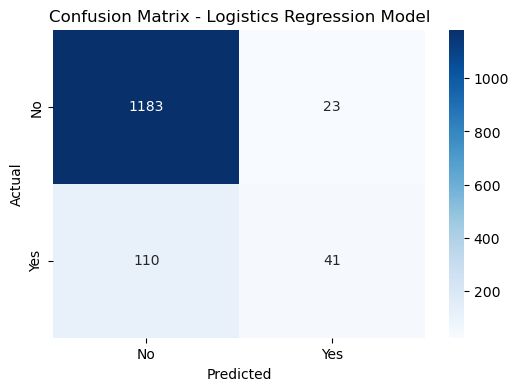

In [565]:
# Confusion matrix for Logistics Regression model
conf_mat = confusion_matrix(Y_test, Y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistics Regression Model")
plt.show()

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Logistic Regression Interpretation</h2>

After evaluating the model on the test data, the results show a **solid performance** in identifying **non-subscribers**. Specifically, the model correctly predicted **1183 clients** who did not subscribe, indicating strong **accuracy** in identifying the "no" class. However, it incorrectly predicted **23 clients as subscribers** when they were actually not, representing a relatively low number of **false positives**.

When it comes to predicting **actual subscribers**, the model correctly identified **41 clients** who did subscribe, but also misclassified **110 subscribers as non-subscribers**. This means the model still struggles with detecting all potential subscribers, though it shows a better balance between **sensitivity** and **precision** compared to KNN.

From a business perspective, this model offers a decent **trade-off**: it minimizes incorrect marketing efforts to uninterested clients while still identifying a reasonable number of actual subscribers. However, further **optimization** or **feature engineering** may be needed to reduce the number of **missed opportunities** among true subscribers.


<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Comparison of KNN, Decision Tree, and Logistic Regression Models</h2> 

| **Model**               | **Test Accuracy** | **Correct No (True Negatives)** | **Incorrect Yes (False Positives)** | **Incorrect No (False Negatives)** | **Correct Yes (True Positives)** | **Strengths**                                         | **Weaknesses**                                              | **Business Impact**                                                                           |
| ----------------------- | ----------------- | ------------------------------- | ----------------------------------- | ---------------------------------- | -------------------------------- | ----------------------------------------------------- | ----------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **K-Nearest Neighbors** | 89%               | 1197                            | 9                                   | 137                                | 14                               | Strong at identifying non-subscribers                 | Misses many actual subscribers (high false negatives)       | Efficiently reduces wasted marketing but misses potential subscribers                         |
| **Decision Tree**       | 90%               | 1162                            | 44                                  | 92                                 | 59                               | Better detection of actual subscribers; interpretable | More false positives; some missed subscribers               | Balances precision and sensitivity; good for targeted marketing                               |
| **Logistic Regression** | 90%               | 1183                            | 23                                  | 110                                | 41                               | Best at recognizing non-subscribers                   | Moderate false negatives; less sensitive than Decision Tree | Supports informed marketing decisions; moderate balance between false positives and negatives |


All three models, **KNN (k=25)**, **Decision Tree**, and **Logistic Regression**, demonstrated **strong overall performance**, each achieving an accuracy of approximately **89% to 90%** on the test data. However, their behaviors in classifying **subscribers (“yes”)** and **non-subscribers (“no”)** reveal key differences.

The **KNN model** showed the highest accuracy in detecting **non-subscribers** but struggled significantly with identifying **actual subscribers**, correctly predicting only **14** out of all the true positives. While efficient at minimizing **false positives**, it misses many potential clients, making it less suitable for marketing purposes where **capturing true subscribers** is critical.

The **Decision Tree model** offered a more **balanced performance**. It correctly identified **59 actual subscribers**, the highest among the three models, while maintaining strong accuracy for non-subscribers. This suggests that the decision tree is more **sensitive to detecting positive responses**, which is valuable for campaign targeting, even though it introduced slightly more **false positives**.

The **Logistic Regression model** provided a **middle ground**. It correctly identified **41 subscribers**, outperforming KNN but not Decision Tree. It maintained a relatively low **false positive rate** and high overall accuracy, making it a **stable and interpretable model** with good **generalization capability**.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Final Recommendation</h2> 

While all models performed well, the Decision Tree stands out as the most effective for this specific business task, as it balances accuracy with the ability to correctly detect actual subscribers, a key objective in marketing-driven decisions. However, further improvements (e.g., feature selection) could enhance performance across all models.